In [12]:
import pandas as pd
import plots_setup
import matplotlib.pyplot as plt

# Use the function to set up the style of graphs
plots_setup.setup_style()

In [13]:
proposals = pd.read_csv('../Data/proposals_word_count_processed.csv')

In [16]:
# Filter the dataset to include only rows where 'Category' is equal to 'New Legislation'
new_proposals = proposals[proposals['Category'] == 'New Legislation'].copy()


In [ ]:
#Create a new column for adjusted total word count (excluding Explanatory Memorandum)
new_proposals['Adjusted_Total_Word_Count'] = new_proposals['Total_Word_Count'] - new_proposals['Explanatory_Memorandum_Word_Count']

#Filter proposals where the Adjusted_Total_Word_Count is less than 5000
filtered_proposals = new_proposals[new_proposals['Adjusted_Total_Word_Count'] < 5000]
print("\nFiltered proposals with Adjusted_Total_Word_Count (excluding Explanatory Memorandum) below 5000 words:")

#Count the number of proposals for each commission
proposals_below_5000 = filtered_proposals.groupby('Commission').size()

#Print the final count
print("\nFinal report of proposals below 5000 words (excluding Explanatory Memorandum) for each commission:")
print(proposals_below_5000)



Filtered proposals with Adjusted_Total_Word_Count (excluding Explanatory Memorandum) below 5000 words:

Final report of proposals below 5000 words (excluding Explanatory Memorandum) for each commission:
Commission
Barroso I          120
Barroso II          85
Election Year       56
Juncker             39
Prodi              134
Von der Leyen I     28
dtype: int64


                 Articles_Word_Count  Annexes_Word_Count  Preamble_Word_Count  \
Commission                                                                      
Prodi                    3405.727700         1095.159624          1305.136150   
Barroso I                4637.789238          820.771300          1484.928251   
Barroso II               6505.144928         1429.427536          2398.869565   
Juncker                  6023.723926         1796.582822          2977.061350   
Von der Leyen I          7472.582781         1109.443709          4053.887417   

                 Explanatory_Memorandum_Word_Count  \
Commission                                           
Prodi                                  3237.276995   
Barroso I                              1942.134529   
Barroso II                             2203.630435   
Juncker                                3387.042945   
Von der Leyen I                        3460.741722   

                 Financial_Statement_Word_Count  Arti

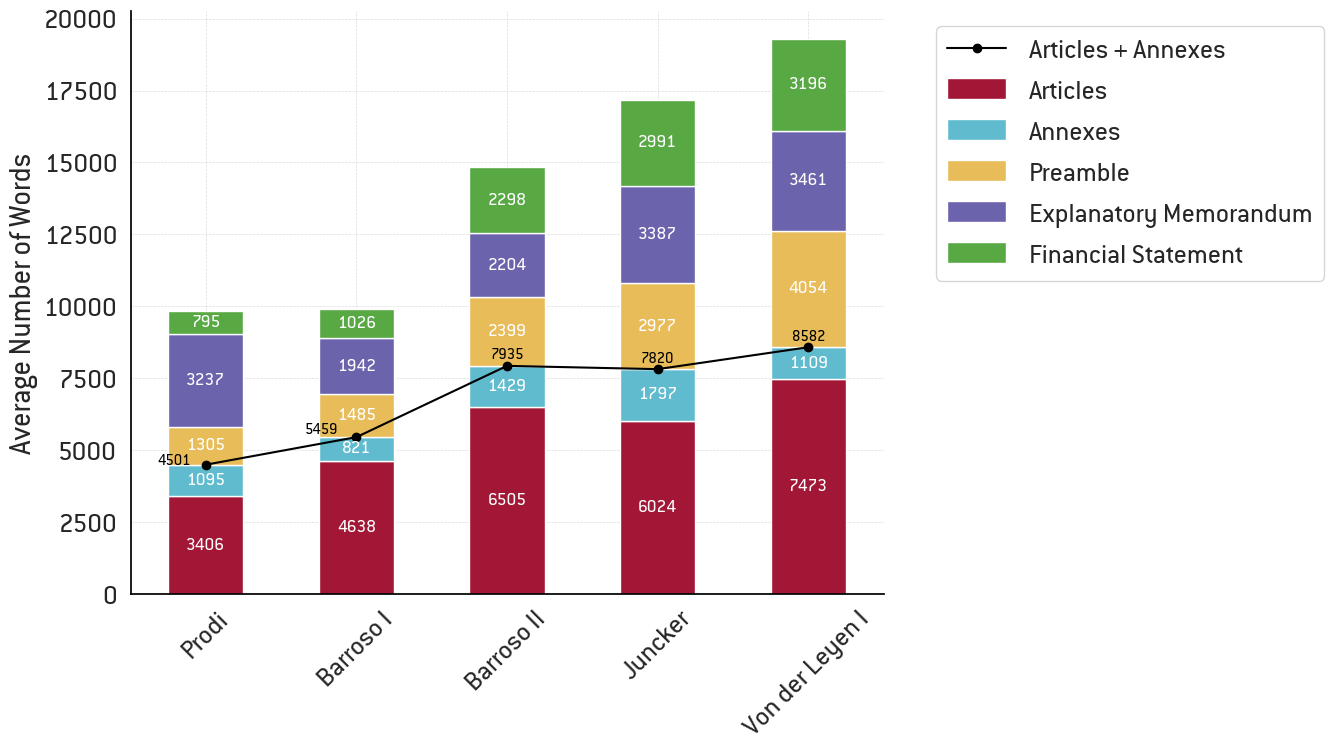

In [19]:
import matplotlib.pyplot as plt

# Define the correct order of commissions
commission_order = ['Prodi', 'Barroso I', 'Barroso II', 'Juncker', 'Von der Leyen I']

# Group by 'Commission' and calculate the average word count for total and each section
average_word_counts = new_proposals.groupby('Commission').mean(numeric_only=True)[
    ['Total_Word_Count', 
     'Explanatory_Memorandum_Word_Count', 
     'Preamble_Word_Count', 
     'Articles_Word_Count', 
     'Annexes_Word_Count',
     'Financial_Statement_Word_Count']]

# Re-order the DataFrame according to the commission order
average_word_counts = average_word_counts.reindex(commission_order)

# Reverse the order of columns so that the required order is maintained: Articles, Annexes, Preamble, Explanatory Memo, Fin statement
average_word_counts = average_word_counts[
    ['Articles_Word_Count', 
     'Annexes_Word_Count', 
     'Preamble_Word_Count', 
     'Explanatory_Memorandum_Word_Count',
     'Financial_Statement_Word_Count']]

# Calculate the sum of Articles and Annexes
average_word_counts['Articles_Annexes_Sum'] = average_word_counts['Articles_Word_Count'] + average_word_counts['Annexes_Word_Count']

# Save the ready-to-graph dataset to Excel
print(average_word_counts.head())  # Print the head of the dataset for verification
average_word_counts.to_excel('../Data/Figure2_data.xlsx', index=True)


# Plotting the data with annotations and a wider figure
fig, ax = plt.subplots(figsize=(14, 8))  # Increase figure width

# Plot the stacked bar chart
bars = average_word_counts.drop(columns=['Articles_Annexes_Sum']).plot(kind='bar', stacked=True, ax=ax, legend=False)

# Plot a line for Articles + Annexes Sum on the same y-axis without a second axis
ax.plot(average_word_counts.index, average_word_counts['Articles_Annexes_Sum'], color='black', marker='o', linestyle='-', label='Articles + Annexes')

# Annotate each section with larger numbers
for container in bars.containers:
    labels = [f'{v.get_height():.0f}' if v.get_height() > 0 else '' for v in container]
    bars.bar_label(container, labels=labels, label_type='center', fontsize=14, color='white')

# Annotate the line graph (Articles + Annexes Sum)
for i, val in enumerate(average_word_counts['Articles_Annexes_Sum']):
    if i == 0:  # Adjusting for the first tick (4501)
        ax.annotate(f'{val:.0f}', (i, val), textcoords="offset points", xytext=(-22.5, 0), ha='center', fontsize=12, color='black')
    elif i == 1:  # Adjusting for the second tick (5459)
        ax.annotate(f'{val:.0f}', (i, val), textcoords="offset points", xytext=(-25, 2.5), ha='center', fontsize=12, color='black')
    else:  # Keep the rest of the ticks centered above the dots
        ax.annotate(f'{val:.0f}', (i, val), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=12, color='black')

# Customizing the chart
ax.set_ylabel('Average Number of Words')
ax.set_xlabel('')
ax.set_xticks(range(len(average_word_counts.index)))
ax.set_xticklabels(average_word_counts.index, rotation=45)
plt.title('')

# Customizing the legend to include the line plot label
ax.legend(['Articles + Annexes', 'Articles', 'Annexes', 'Preamble', 'Explanatory Memorandum', 'Financial Statement'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


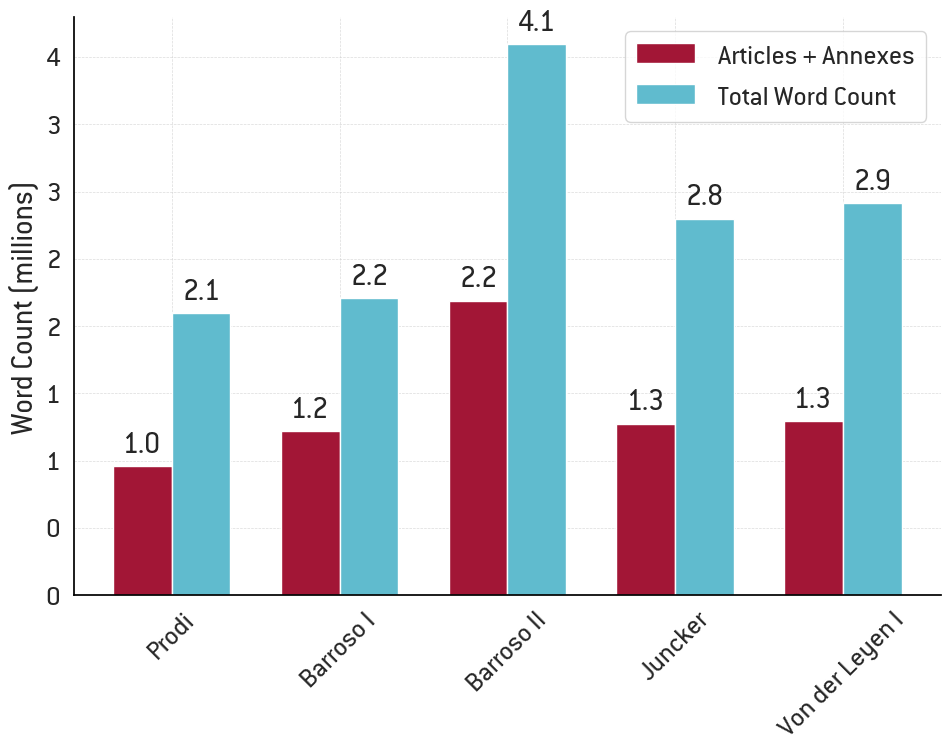

In [20]:
# Group by 'Commission' and sum the 'Articles_Word_Count', 'Annexes_Word_Count', and 'Total_Word_Count'
articles_annexes_sum = new_proposals.groupby('Commission')[['Articles_Word_Count', 'Annexes_Word_Count', 'Total_Word_Count']].sum()

# Create a new column that sums both 'Articles_Word_Count' and 'Annexes_Word_Count'
articles_annexes_sum['Articles_Annexes_Sum'] = (articles_annexes_sum['Articles_Word_Count'] + 
                                                articles_annexes_sum['Annexes_Word_Count']) / 1e6  # Convert to millions

# Convert 'Total_Word_Count' to millions as well
articles_annexes_sum['Total_Word_Count'] = articles_annexes_sum['Total_Word_Count'] / 1e6  # Convert to millions

# Define the correct order of commissions
commission_order = ['Prodi', 'Barroso I', 'Barroso II', 'Juncker', 'Von der Leyen I']

# Reorder the DataFrame according to the commission order
articles_annexes_sum = articles_annexes_sum.reindex(commission_order)

# Plot the total sum of Articles + Annexes and Total Word Count for each commission
fig, ax = plt.subplots(figsize=(10, 8))

# Create bar chart for both 'Articles_Annexes_Sum' and 'Total_Word_Count'
bar_width = 0.35  # Width of each bar
index = range(len(commission_order))  # X positions for the bars

# Plot bars for Articles + Annexes
bars1 = ax.bar([i - bar_width/2 for i in index], articles_annexes_sum['Articles_Annexes_Sum'], 
               bar_width, label='Articles + Annexes')

# Plot bars for Total Word Count
bars2 = ax.bar([i + bar_width/2 for i in index], articles_annexes_sum['Total_Word_Count'], 
               bar_width, label='Total Word Count')

# Customize the plot
ax.set_ylabel('Word Count (millions)')
ax.set_xlabel('')
ax.set_title('')
ax.set_xticks(index)
ax.set_xticklabels(articles_annexes_sum.index, rotation=45)

# Set the y-axis to show integer values (millions)
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x)}'))

# Add precise number of millions rounded to 1 decimal point above each bar for 'Articles + Annexes'
for i, value in enumerate(articles_annexes_sum['Articles_Annexes_Sum']):
    ax.text(i - bar_width/2, value + 0.05, f'{value:.1f}', ha='center', va='bottom')

# Add precise number of millions rounded to 1 decimal point above each bar for 'Total Word Count'
for i, value in enumerate(articles_annexes_sum['Total_Word_Count']):
    ax.text(i + bar_width/2, value + 0.05, f'{value:.1f}', ha='center', va='bottom')

# Add legend to differentiate the two bars
ax.legend()

plt.tight_layout()

# Show the plot
plt.show()


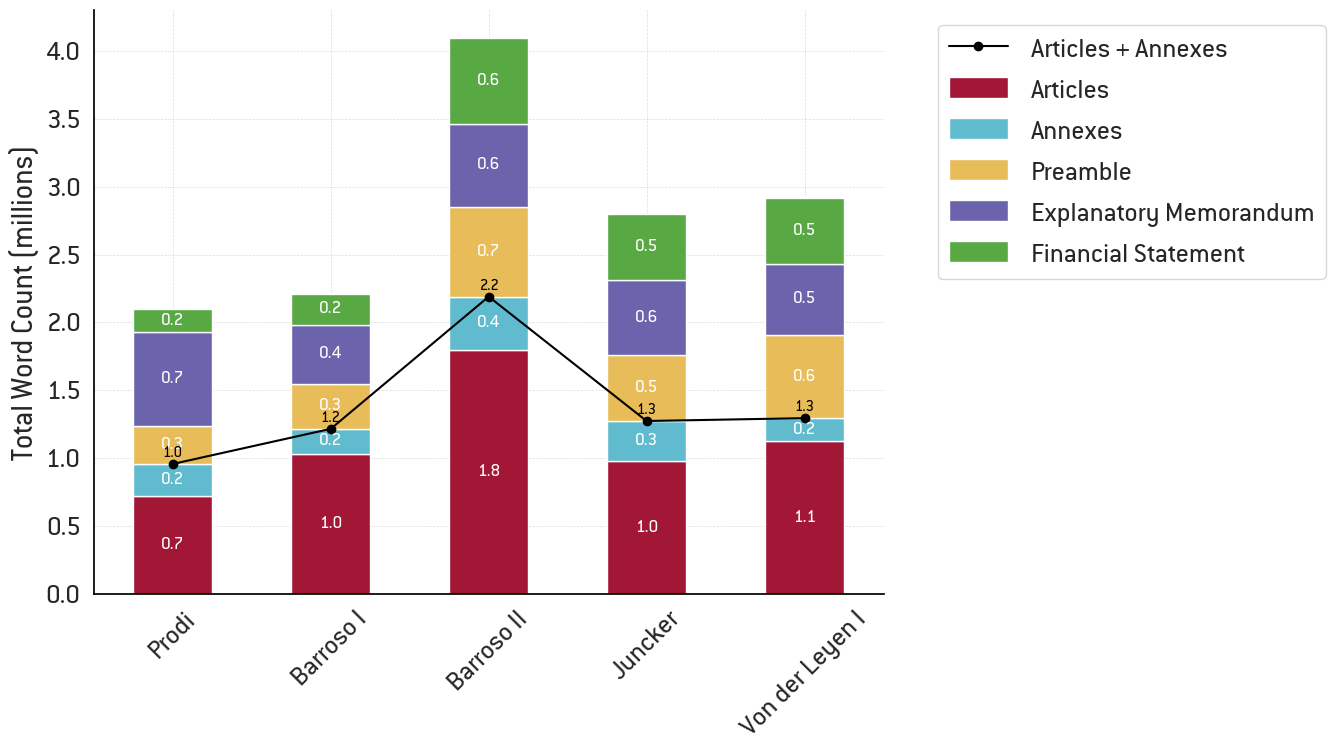

In [21]:
import matplotlib.pyplot as plt

# Define the correct order of commissions
commission_order = ['Prodi', 'Barroso I', 'Barroso II', 'Juncker', 'Von der Leyen I']

# Group by 'Commission' and calculate the sum of word counts for total and each section
sum_word_counts = new_proposals.groupby('Commission').sum(numeric_only=True)[
    ['Total_Word_Count', 
     'Explanatory_Memorandum_Word_Count', 
     'Preamble_Word_Count', 
     'Articles_Word_Count', 
     'Annexes_Word_Count',
     'Financial_Statement_Word_Count']]

# Re-order the DataFrame according to the commission order
sum_word_counts = sum_word_counts.reindex(commission_order)

# Reverse the order of columns so that the required order is maintained: Articles, Annexes, Preamble, Explanatory Memo, Fin statement
sum_word_counts = sum_word_counts[
    ['Articles_Word_Count', 
     'Annexes_Word_Count', 
     'Preamble_Word_Count', 
     'Explanatory_Memorandum_Word_Count',
     'Financial_Statement_Word_Count']]

# Convert word counts to millions
sum_word_counts = sum_word_counts / 1e6

# Calculate the sum of Articles and Annexes in millions
sum_word_counts['Articles_Annexes_Sum'] = sum_word_counts['Articles_Word_Count'] + sum_word_counts['Annexes_Word_Count']

# Plotting the data with annotations and a wider figure
fig, ax = plt.subplots(figsize=(14, 8))  # Increase figure width

# Plot the stacked bar chart
bars = sum_word_counts.drop(columns=['Articles_Annexes_Sum']).plot(kind='bar', stacked=True, ax=ax, legend=False)

# Plot a line for Articles + Annexes Sum on the same y-axis without a second axis
ax.plot(sum_word_counts.index, sum_word_counts['Articles_Annexes_Sum'], color='black', marker='o', linestyle='-', label='Articles + Annexes')

# Annotate each section with larger numbers in millions
for container in bars.containers:
    labels = [f'{v.get_height():.1f}' if v.get_height() > 0 else '' for v in container]
    bars.bar_label(container, labels=labels, label_type='center', fontsize=14, color='white')

# Annotate the line graph (Articles + Annexes Sum) with precise numbers
for i, val in enumerate(sum_word_counts['Articles_Annexes_Sum']):
    ax.annotate(f'{val:.1f}', (i, val), textcoords="offset points", xytext=(0, 5), ha='center', fontsize=12, color='black')

# Customizing the chart
ax.set_ylabel('Total Word Count (millions)')
ax.set_xlabel('')
ax.set_xticks(range(len(sum_word_counts.index)))
ax.set_xticklabels(sum_word_counts.index, rotation=45)
plt.title('')

# Customizing the legend to include the line plot label
ax.legend(['Articles + Annexes', 'Articles', 'Annexes', 'Preamble', 'Explanatory Memorandum', 'Financial Statement'], bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()
